In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
class gaussian(torch.nn.Module):
    def __init__(self, A=1.0, x0=2.0, sigma=0.5) -> None:
        super().__init__()
        self.x0 = torch.nn.Parameter(torch.tensor(x0, dtype=torch.double))
        self.sigma = torch.nn.Parameter(torch.tensor(sigma, dtype=torch.double))
        self.A = torch.nn.Parameter(torch.tensor(A, dtype=torch.double))
    
    def forward(self, xs):
        return self.A*torch.exp(-(xs-self.x0)**2/(2.0*self.sigma**2))
    
    def freeze_params(self, params_for_freeze):
        for param, param_for_freeze in zip(self.parameters(), params_for_freeze):
            if param == param_for_freeze:
                param.requires_grad = False

def train(model, data, optimizer,loss_func, N_steps):
    loss_vals = []
    for step in range(N_steps):
        optimizer.zero_grad()
        loss = loss_func(model.forward(data[:,0]), data[:,1])
        loss_vals.append(loss)
        loss.backward()
        optimizer.step()
    return loss_vals

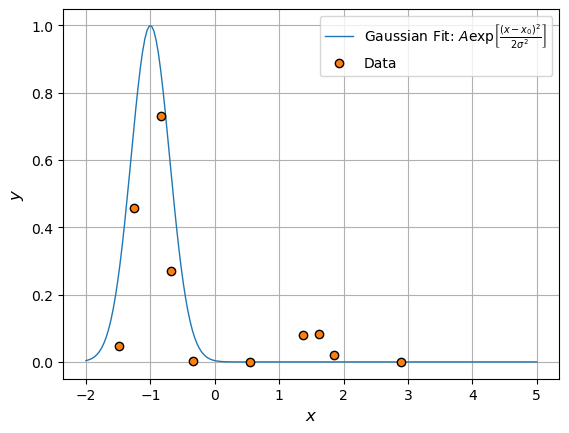

In [3]:
data = torch.tensor([[-1.493,  0.048],[-1.25 ,  0.459], [-0.842,  0.731],
       [-0.676,  0.269],
       [-0.332,  0.004],
       [ 0.544,  0.   ],
       [ 1.363,  0.079],
       [ 1.621,  0.083],
       [ 1.853,  0.021],
       [ 2.892,  0.   ]], requires_grad=True, dtype=torch.double)
fig, ax = plt.subplots()
ax.grid()
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$y$", fontsize=12)
gauss = gaussian(x0=-1.0, sigma=0.3)
gauss.freeze_params([gauss.x0, gauss.sigma]) #We freeze x0 and sigma, we do this by require_grad = False
xs = torch.linspace(-2.0,5.0, 200)
with torch.no_grad():
    ax.plot(xs, gauss.forward(xs), lw=1, label=r"Gaussian Fit: $A$exp$\left[\frac{(x-x_0)^2}{2\sigma^2}\right]$")
    ax.plot(data[:,0], data[:,1], 'o', markeredgecolor="k", label="Data")
ax.legend()

In [4]:
optimizer = torch.optim.Adam(params=gauss.parameters())
loss_func = torch.nn.MSELoss()
N_steps = 10000
loss_vals = train(model=gauss, data=data, optimizer=optimizer,loss_func=loss_func, N_steps=N_steps)

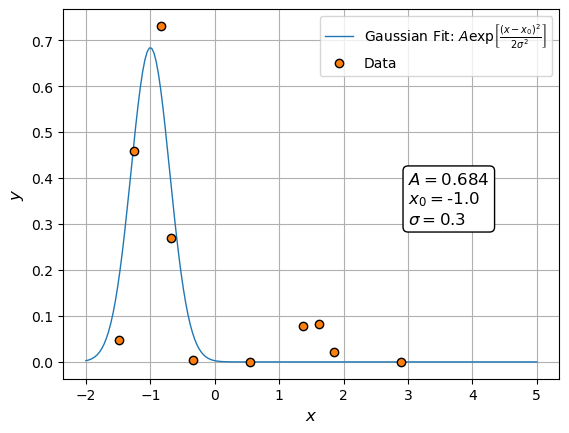

In [5]:
fig, ax = plt.subplots()
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$y$", fontsize=12)
ax.grid()
xs = torch.linspace(-2.0,5.0, 200)
ax.annotate(text=rf"$A = ${round(gauss.A.item(), 3)}"+"\n"rf"$x_0 = ${round(gauss.x0.item(), 3)}"+"\n"rf"$\sigma = ${round(gauss.sigma.item(), 3)}", xy=(3.0, 0.3), fontsize=12, bbox=dict(boxstyle="round", fc="w"))
with torch.no_grad():
    ax.plot(xs, gauss.forward(xs), lw=1, label=r"Gaussian Fit: $A$exp$\left[\frac{(x-x_0)^2}{2\sigma^2}\right]$")
    ax.plot(data[:,0], data[:,1], 'o', markeredgecolor="k", label="Data")
ax.legend()

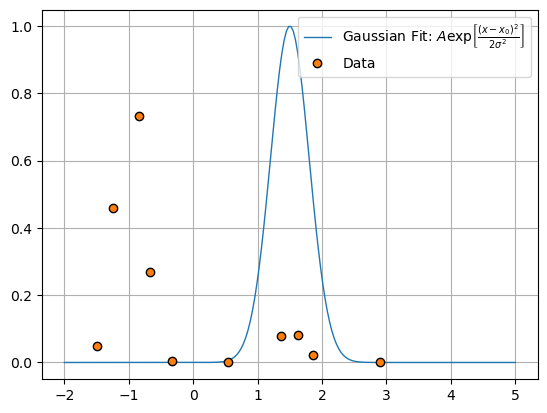

In [6]:
fig, ax = plt.subplots()
ax.grid()
gauss = gaussian(x0=1.5, sigma=0.3)
gauss.freeze_params([gauss.x0, gauss.sigma]) #We freeze x0 and sigma, we do this by require_grad = False
xs = torch.linspace(-2.0,5.0, 200)
with torch.no_grad():
    ax.plot(xs, gauss.forward(xs), lw=1, label=r"Gaussian Fit: $A$exp$\left[\frac{(x-x_0)^2}{2\sigma^2}\right]$")
    ax.plot(data[:,0], data[:,1], 'o', markeredgecolor="k", label="Data")
ax.legend()

In [7]:
optimizer = torch.optim.Adam(params=gauss.parameters())
loss_func = loss_func = torch.nn.MSELoss()
N_steps = 10000
loss_vals = train(model=gauss, data=data, optimizer=optimizer,loss_func=loss_func, N_steps=N_steps)

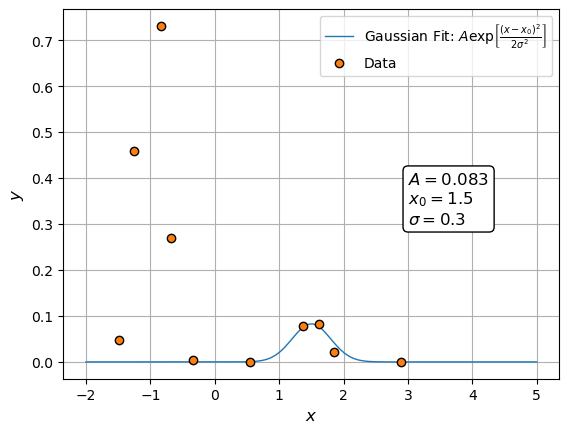

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel(r"$x$", fontsize=12)
ax.set_ylabel(r"$y$", fontsize=12)
ax.grid()
xs = torch.linspace(-2.0,5.0, 200)
ax.annotate(text=rf"$A = ${round(gauss.A.item(), 3)}"+"\n"rf"$x_0 = ${round(gauss.x0.item(), 3)}"+"\n"rf"$\sigma = ${round(gauss.sigma.item(), 3)}", xy=(3.0, 0.3), fontsize=12, bbox=dict(boxstyle="round", fc="w"))
with torch.no_grad():
    ax.plot(xs, gauss.forward(xs), lw=1, label=r"Gaussian Fit: $A$exp$\left[\frac{(x-x_0)^2}{2\sigma^2}\right]$")
    ax.plot(data[:,0], data[:,1], 'o', markeredgecolor="k", label="Data")
ax.legend()

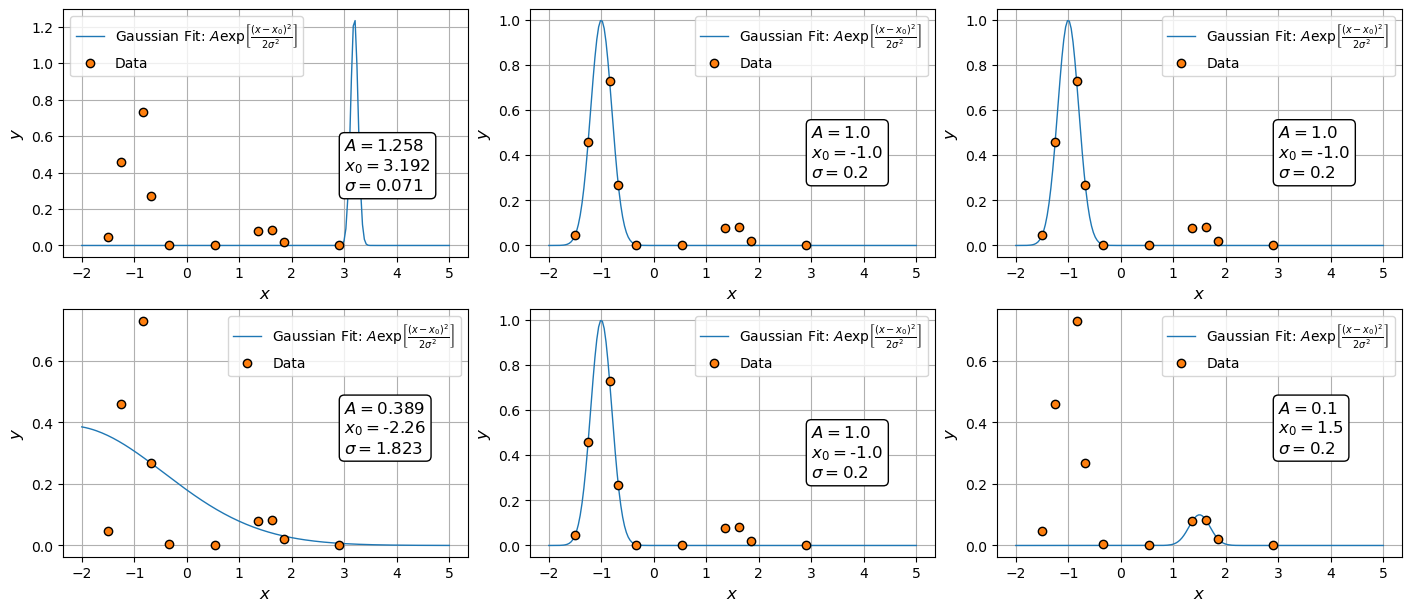

In [39]:
fig, axs = plt.subplots(2,3, figsize=(14,6), layout="constrained")
loss_func = torch.nn.MSELoss()
N_steps = 10000
xs = torch.linspace(-2.0,5.0, 200)
for ax in axs.flatten():
    ax.set_xlabel(r"$x$", fontsize=12)
    ax.set_ylabel(r"$y$", fontsize=12)
    ax.grid()
    model = gaussian(A=np.random.rand(1)+1.0, x0=np.random.rand(1)*5.5-2.0, sigma=np.random.rand(1))
    optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)
    loss_vals = train(model=model, data=data, optimizer=optimizer,loss_func=loss_func, N_steps=N_steps)
    ax.annotate(text=rf"$A = ${round(model.A.item(), 3)}"+"\n"rf"$x_0 = ${round(model.x0.item(), 3)}"+"\n"rf"$\sigma = ${round(model.sigma.item(), 3)}", xy=(3.0, 0.3), fontsize=12, bbox=dict(boxstyle="round", fc="w"))
    with torch.no_grad():
        ax.plot(xs, model.forward(xs), lw=1, label=r"Gaussian Fit: $A$exp$\left[\frac{(x-x_0)^2}{2\sigma^2}\right]$")
        ax.plot(data[:,0], data[:,1], 'o', markeredgecolor="k", label="Data", c="C1")
    ax.legend()